<a href="https://colab.research.google.com/github/Aifang-Zhou/notebookc/blob/master/from_ground_to_sky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🌍 THE COMPLETE ATMOSPHERIC STORY 🌍
🎯 GOAL: Build a complete 3D picture of the atmosphere
📚 LEARN: How different instruments work together
🔬 DATA: Ground → Clouds → Upper Atmosphere

🏗️ PART 1: BUILDING THE ATMOSPHERIC TOWER
--------------------------------------------------


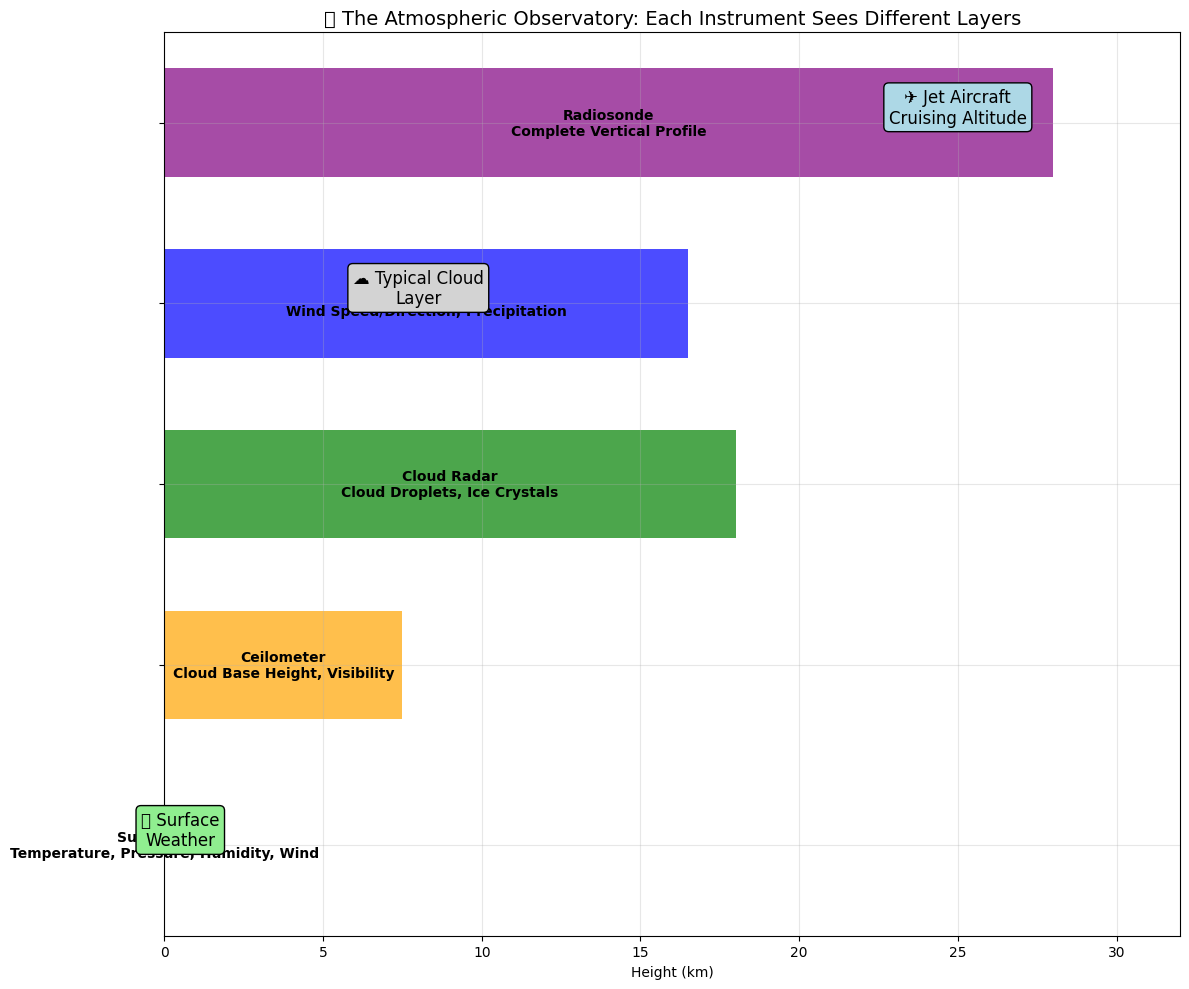


💡 KEY CONCEPT: Each instrument gives us a different piece of the puzzle!
   🌡️  Surface Met: What you feel when you step outside
   📏 Ceilometer: How high are the clouds?
   ☁️  Cloud Radar: What's inside the clouds?
   💨 Wind Profiler: How air moves through the atmosphere
   🎈 Radiosonde: The complete vertical story
🌍 REAL ARM DATA ANALYSIS: MAY 11, 2011 🌍
📂 STEP 1: Upload your ARM data files
📤 Please upload your ARM data files one by one:
   1. sgpvdisquantsC1.c1.20110511.000000.nc (Disdrometer)
   2. sgp915rwpvertvelC1.c1.20110511.000000.nc (Wind Profiler)
   3. sgpceilC1.b1.20110511.000012.nc (Ceilometer)
   4. sgpsondewnpnC1.b1.20110511.053100.cdf (Radiosonde)

Click the upload button below and select all 4 files:


Saving sgp915rwpvertvelC1.c1.20110511.000000.nc to sgp915rwpvertvelC1.c1.20110511.000000.nc
Saving sgpceilC1.b1.20110511.000012.nc to sgpceilC1.b1.20110511.000012.nc
Saving sgpsondewnpnC1.b1.20110511.053100.cdf to sgpsondewnpnC1.b1.20110511.053100.cdf
Saving sgpvdisquantsC1.c1.20110511.000000.nc to sgpvdisquantsC1.c1.20110511.000000.nc

✅ Successfully uploaded 4 files!
   📁 sgp915rwpvertvelC1.c1.20110511.000000.nc
   📁 sgpceilC1.b1.20110511.000012.nc
   📁 sgpsondewnpnC1.b1.20110511.053100.cdf
   📁 sgpvdisquantsC1.c1.20110511.000000.nc

📊 STEP 2: LOADING ARM DATASETS
🔄 Loading datasets...
✅ Disdrometer (VDIS) data loaded
✅ Wind Profiler (915 MHz) data loaded
✅ Ceilometer data loaded
✅ Radiosonde data loaded

🔍 STEP 3: EXPLORING DATA STRUCTURES

📡 WIND PROFILER (915 MHz) Variables:
Available variables: ['base_time', 'time_offset', 'reflectivity_factor', 'radial_velocity', 'qc_radial_velocity', 'vertical_velocity', 'echo_classification', 'freezing_level', 'lat', 'lon', 'alt']
Dimensions: 

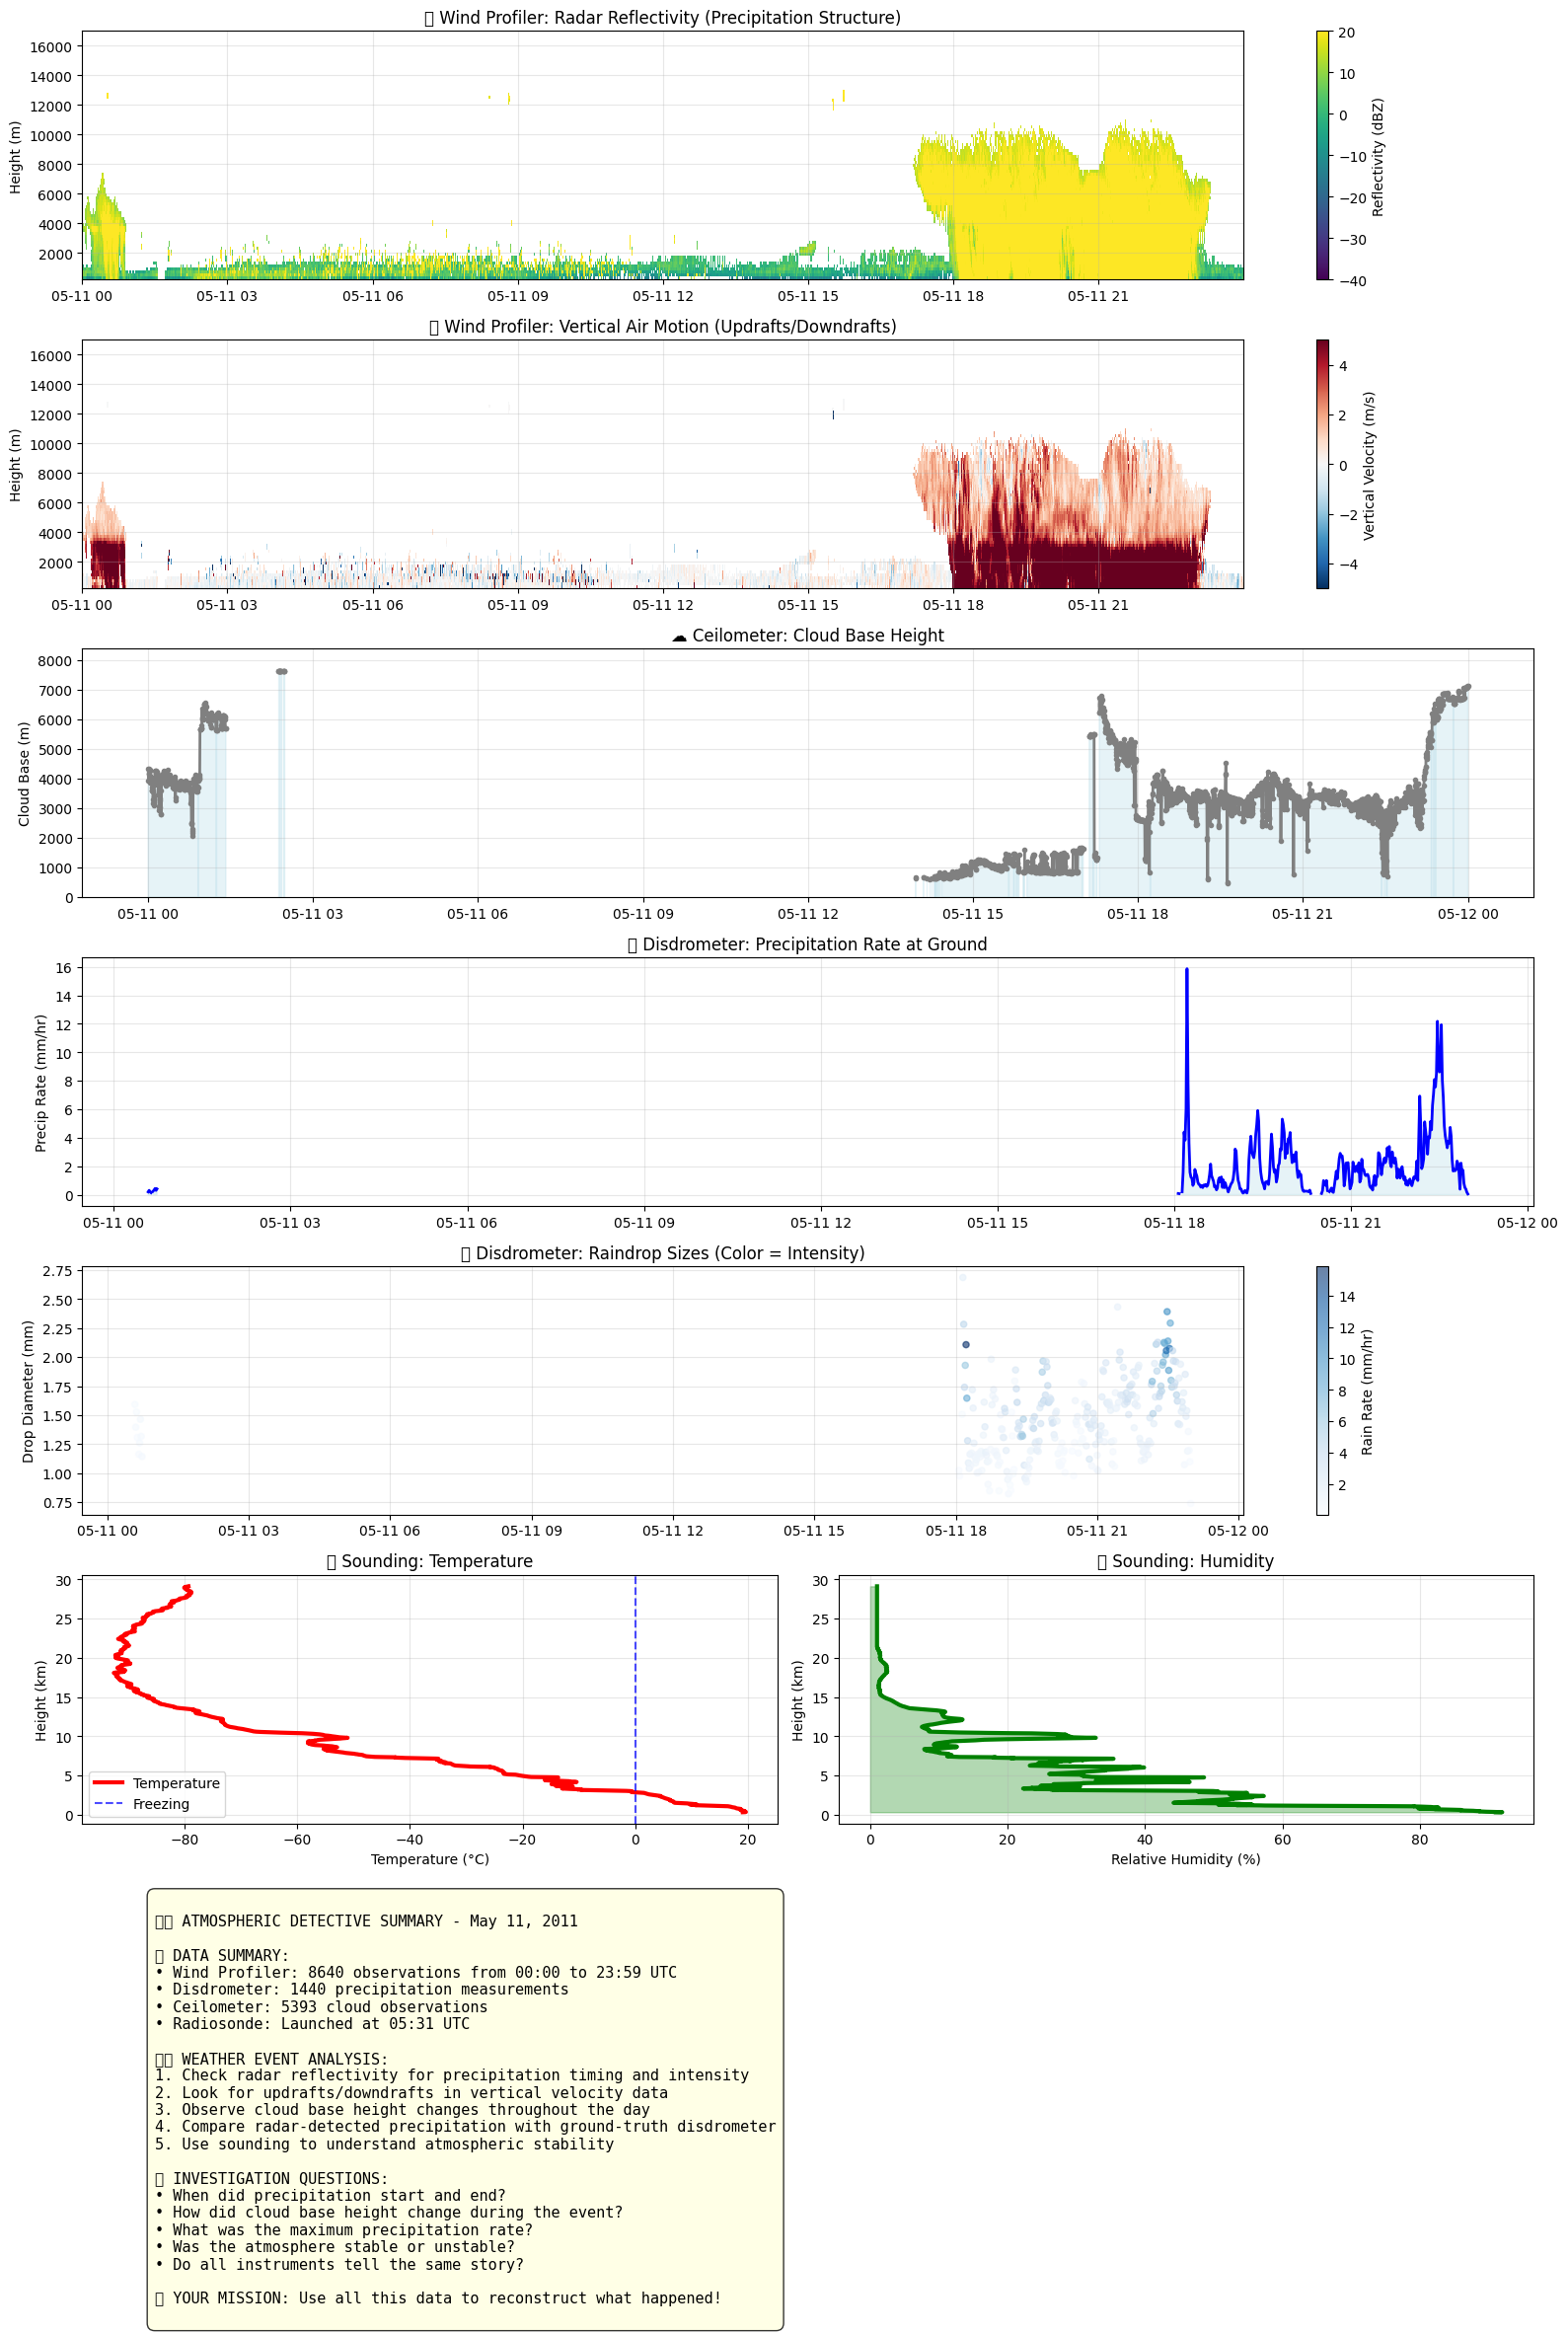


🔧 STEP 6: INTERACTIVE ANALYSIS TOOLS
💡 Now you can explore the data further!

🔍 Try these analysis commands:

# Examine specific time periods:
start_time = pd.Timestamp('2011-05-11 15:00')
end_time = pd.Timestamp('2011-05-11 17:00')
time_mask = (rwp_time >= start_time) & (rwp_time <= end_time)

# Calculate statistics:
max_reflectivity = reflectivity.max()
if precip_rate is not None:
    total_rainfall = (precip_rate * (1/60)).sum()  # Convert to mm
    print(f'Total rainfall: {total_rainfall:.2f} mm')

# Find interesting features:
if cloud_base is not None:
    min_cloud_base = cloud_base.min()
    print(f'Lowest cloud base: {min_cloud_base:.0f} m')

🎓 LEARNING OBJECTIVES ACHIEVED:
✅ Loaded and visualized multi-instrument ARM data
✅ Created time-height cross-sections
✅ Analyzed precipitation from multiple perspectives
✅ Examined atmospheric vertical structure
✅ Connected ground-based and remote sensing observations

💾 Datasets loaded successfully! You can now explore:
   ds_rwp: Wind 

In [2]:
# THE COMPLETE ATMOSPHERIC STORY: FROM GROUND TO SKY
# ================================================================
# Using ARM Data to Understand the Full Weather Picture
# Students will build a 3D understanding of atmospheric processes

import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

print("🌍 THE COMPLETE ATMOSPHERIC STORY 🌍")
print("="*60)
print("🎯 GOAL: Build a complete 3D picture of the atmosphere")
print("📚 LEARN: How different instruments work together")
print("🔬 DATA: Ground → Clouds → Upper Atmosphere")
print("="*60)

# ================================================================
# PART 1: THE ATMOSPHERIC LAYERS CONCEPT
# ================================================================
print("\n🏗️ PART 1: BUILDING THE ATMOSPHERIC TOWER")
print("-" * 50)

# Create a conceptual diagram showing instrument coverage
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Define height ranges for different instruments
heights = {
    'Surface Met': [0, 0.01],
    'Ceilometer': [0, 7.5],
    'Cloud Radar': [0, 18],
    'Wind Profiler': [0, 16.5],
    'Radiosonde': [0, 28]
}

colors = ['brown', 'orange', 'green', 'blue', 'purple']
labels = list(heights.keys())

# Draw the atmospheric layers
for i, (instrument, height_range) in enumerate(heights.items()):
    ax.barh(i, height_range[1], left=0, height=0.6,
            color=colors[i], alpha=0.7, label=instrument)

    # Add instrument descriptions
    descriptions = [
        'Temperature, Pressure, Humidity, Wind',
        'Cloud Base Height, Visibility',
        'Cloud Droplets, Ice Crystals',
        'Wind Speed/Direction, Precipitation',
        'Complete Vertical Profile'
    ]

    ax.text(height_range[1]/2, i, f'{instrument}\n{descriptions[i]}',
            ha='center', va='center', fontweight='bold', fontsize=10)

ax.set_ylim(-0.5, len(heights)-0.5)
ax.set_xlim(0, 32)
ax.set_xlabel('Height (km)')
ax.set_title('🏗️ The Atmospheric Observatory: Each Instrument Sees Different Layers', fontsize=14)
ax.set_yticks(range(len(heights)))
ax.set_yticklabels([])
ax.grid(True, alpha=0.3)

# Add atmospheric phenomena
ax.text(25, 4, '✈️ Jet Aircraft\nCruising Altitude', ha='center', fontsize=12,
        bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))
ax.text(8, 3, '☁️ Typical Cloud\nLayer', ha='center', fontsize=12,
        bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray"))
ax.text(0.5, 0, '🏠 Surface\nWeather', ha='center', fontsize=12,
        bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen"))

plt.tight_layout()
plt.show()

print("\n💡 KEY CONCEPT: Each instrument gives us a different piece of the puzzle!")
print("   🌡️  Surface Met: What you feel when you step outside")
print("   📏 Ceilometer: How high are the clouds?")
print("   ☁️  Cloud Radar: What's inside the clouds?")
print("   💨 Wind Profiler: How air moves through the atmosphere")
print("   🎈 Radiosonde: The complete vertical story")


# REAL ARM DATA ANALYSIS: THE COMPLETE ATMOSPHERIC STORY
# ================================================================
# Using actual ARM data from May 11, 2011 at Southern Great Plains site

# Install required packages
!pip install netcdf4 xarray

import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

print("🌍 REAL ARM DATA ANALYSIS: MAY 11, 2011 🌍")
print("="*60)
print("📂 STEP 1: Upload your ARM data files")
print("="*60)

# ================================================================
# STEP 1: UPLOAD FILES TO COLAB
# ================================================================
from google.colab import files

print("📤 Please upload your ARM data files one by one:")
print("   1. sgpvdisquantsC1.c1.20110511.000000.nc (Disdrometer)")
print("   2. sgp915rwpvertvelC1.c1.20110511.000000.nc (Wind Profiler)")
print("   3. sgpceilC1.b1.20110511.000012.nc (Ceilometer)")
print("   4. sgpsondewnpnC1.b1.20110511.053100.cdf (Radiosonde)")
print("\nClick the upload button below and select all 4 files:")

# Upload all files at once
uploaded = files.upload()

print(f"\n✅ Successfully uploaded {len(uploaded)} files!")
for filename in uploaded.keys():
    print(f"   📁 {filename}")

# ================================================================
# STEP 2: LOAD AND EXAMINE EACH DATASET
# ================================================================
print("\n" + "="*60)
print("📊 STEP 2: LOADING ARM DATASETS")
print("="*60)

# Load each dataset
print("🔄 Loading datasets...")

try:
    # Disdrometer data
    ds_vdis = xr.open_dataset('sgpvdisquantsC1.c1.20110511.000000.nc')
    print("✅ Disdrometer (VDIS) data loaded")

    # Wind Profiler data
    ds_rwp = xr.open_dataset('sgp915rwpvertvelC1.c1.20110511.000000.nc')
    print("✅ Wind Profiler (915 MHz) data loaded")

    # Ceilometer data
    ds_ceil = xr.open_dataset('sgpceilC1.b1.20110511.000012.nc')
    print("✅ Ceilometer data loaded")

    # Radiosonde data
    ds_sonde = xr.open_dataset('sgpsondewnpnC1.b1.20110511.053100.cdf')
    print("✅ Radiosonde data loaded")

except FileNotFoundError as e:
    print(f"❌ Error: {e}")
    print("Please make sure you uploaded all 4 files with the exact names shown above.")

# ================================================================
# STEP 3: EXPLORE DATASET STRUCTURES
# ================================================================
print("\n" + "="*60)
print("🔍 STEP 3: EXPLORING DATA STRUCTURES")
print("="*60)

print("\n📡 WIND PROFILER (915 MHz) Variables:")
print("Available variables:", list(ds_rwp.data_vars.keys()))
print("Dimensions:", dict(ds_rwp.dims))

print("\n💧 DISDROMETER Variables:")
print("Available variables:", list(ds_vdis.data_vars.keys()))
print("Dimensions:", dict(ds_vdis.dims))

print("\n☁️ CEILOMETER Variables:")
print("Available variables:", list(ds_ceil.data_vars.keys()))
print("Dimensions:", dict(ds_ceil.dims))

print("\n🎈 RADIOSONDE Variables:")
print("Available variables:", list(ds_sonde.data_vars.keys()))
print("Dimensions:", dict(ds_sonde.dims))

# ================================================================
# STEP 4: EXTRACT KEY VARIABLES AND SYNC TIME
# ================================================================
print("\n" + "="*60)
print("⏰ STEP 4: EXTRACTING AND SYNCHRONIZING DATA")
print("="*60)

# Convert all times to pandas datetime for easier handling
print("🕐 Converting time coordinates...")

# Wind Profiler times
rwp_time = pd.to_datetime(ds_rwp['time'].values)
print(f"Wind Profiler time range: {rwp_time[0]} to {rwp_time[-1]}")

# Disdrometer times
vdis_time = pd.to_datetime(ds_vdis['time'].values)
print(f"Disdrometer time range: {vdis_time[0]} to {vdis_time[-1]}")

# Ceilometer times
ceil_time = pd.to_datetime(ds_ceil['time'].values)
print(f"Ceilometer time range: {ceil_time[0]} to {ceil_time[-1]}")

# Radiosonde time (single profile)
sonde_time = pd.to_datetime(ds_sonde['time'].values)
print(f"Radiosonde launch time: {sonde_time[0]}")

# ================================================================
# STEP 5: CREATE THE COMPLETE ATMOSPHERIC STORY PLOT
# ================================================================
print("\n" + "="*60)
print("📈 STEP 5: THE COMPLETE ATMOSPHERIC STORY")
print("="*60)

# Create the master figure
fig = plt.figure(figsize=(16, 24))

# ----------------------------------------------------------------
# Panel 1: Wind Profiler Reflectivity (Precipitation Detection)
# ----------------------------------------------------------------
ax1 = plt.subplot(7, 1, 1)

# Extract reflectivity and clean missing values
reflectivity = ds_rwp['reflectivity_factor'].where(ds_rwp['reflectivity_factor'] != -9999.0)
heights_rwp = ds_rwp['height'].values

# Create time-height plot
Time_rwp, Height_rwp = np.meshgrid(rwp_time, heights_rwp)
im1 = ax1.pcolormesh(Time_rwp, Height_rwp, reflectivity.T,
                     cmap='viridis', shading='auto', vmin=-40, vmax=20)
ax1.set_ylabel('Height (m)')
ax1.set_title('📡 Wind Profiler: Radar Reflectivity (Precipitation Structure)')
plt.colorbar(im1, ax=ax1, label='Reflectivity (dBZ)')
ax1.grid(True, alpha=0.3)

# ----------------------------------------------------------------
# Panel 2: Wind Profiler Vertical Velocity
# ----------------------------------------------------------------
ax2 = plt.subplot(7, 1, 2)

# Extract vertical velocity and clean
if 'radial_velocity' in ds_rwp.data_vars:
    vertical_vel = ds_rwp['radial_velocity'].where(ds_rwp['radial_velocity'] != -9999.0)
elif 'vertical_velocity' in ds_rwp.data_vars:
    vertical_vel = ds_rwp['vertical_velocity'].where(ds_rwp['vertical_velocity'] != -9999.0)
else:
    # Use the first velocity variable available
    vel_vars = [var for var in ds_rwp.data_vars if 'vel' in var.lower()]
    if vel_vars:
        vertical_vel = ds_rwp[vel_vars[0]].where(ds_rwp[vel_vars[0]] != -9999.0)
    else:
        vertical_vel = None

if vertical_vel is not None:
    im2 = ax2.pcolormesh(Time_rwp, Height_rwp, vertical_vel.T,
                         cmap='RdBu_r', shading='auto', vmin=-5, vmax=5)
    ax2.set_ylabel('Height (m)')
    ax2.set_title('💨 Wind Profiler: Vertical Air Motion (Updrafts/Downdrafts)')
    plt.colorbar(im2, ax=ax2, label='Vertical Velocity (m/s)')
    ax2.grid(True, alpha=0.3)

# ----------------------------------------------------------------
# Panel 3: Ceilometer Cloud Base Height
# ----------------------------------------------------------------
ax3 = plt.subplot(7, 1, 3)

# Extract cloud base height
if 'first_cbh' in ds_ceil.data_vars:
    cloud_base = ds_ceil['first_cbh'].where(ds_ceil['first_cbh'] > 0)
elif 'cloud_base_height' in ds_ceil.data_vars:
    cloud_base = ds_ceil['cloud_base_height'].where(ds_ceil['cloud_base_height'] > 0)
else:
    # Find any variable with 'cloud' or 'base' in name
    cloud_vars = [var for var in ds_ceil.data_vars if 'cloud' in var.lower() or 'base' in var.lower()]
    if cloud_vars:
        cloud_base = ds_ceil[cloud_vars[0]].where(ds_ceil[cloud_vars[0]] > 0)
    else:
        cloud_base = None

if cloud_base is not None:
    ax3.plot(ceil_time, cloud_base, 'gray', linewidth=2, marker='o', markersize=3)
    ax3.fill_between(ceil_time, cloud_base, alpha=0.3, color='lightblue')
    ax3.set_ylabel('Cloud Base (m)')
    ax3.set_title('☁️ Ceilometer: Cloud Base Height')
    ax3.grid(True, alpha=0.3)
    ax3.set_ylim(0, cloud_base.max() * 1.1 if cloud_base.max() > 0 else 5000)

# ----------------------------------------------------------------
# Panel 4: Disdrometer Precipitation Rate
# ----------------------------------------------------------------
ax4 = plt.subplot(7, 1, 4)

# Extract precipitation variables
if 'precipitation_rate' in ds_vdis.data_vars:
    precip_rate = ds_vdis['precipitation_rate']
elif 'rain_rate' in ds_vdis.data_vars:
    precip_rate = ds_vdis['rain_rate']
else:
    # Find any precipitation-related variable
    precip_vars = [var for var in ds_vdis.data_vars if any(word in var.lower()
                   for word in ['precip', 'rain', 'rate'])]
    if precip_vars:
        precip_rate = ds_vdis[precip_vars[0]]
    else:
        precip_rate = None

if precip_rate is not None:
    # Clean negative or unrealistic values
    precip_clean = precip_rate.where((precip_rate >= 0) & (precip_rate < 100))

    ax4.plot(vdis_time, precip_clean, 'blue', linewidth=2)
    ax4.fill_between(vdis_time, precip_clean, alpha=0.3, color='lightblue')
    ax4.set_ylabel('Precip Rate (mm/hr)')
    ax4.set_title('🌧️ Disdrometer: Precipitation Rate at Ground')
    ax4.grid(True, alpha=0.3)

# ----------------------------------------------------------------
# Panel 5: Disdrometer Drop Size Distribution
# ----------------------------------------------------------------
ax5 = plt.subplot(7, 1, 5)

# Look for drop size variables
if 'drop_diameter' in ds_vdis.data_vars:
    drop_sizes = ds_vdis['drop_diameter']
elif 'diameter' in ds_vdis.data_vars:
    drop_sizes = ds_vdis['diameter']
else:
    # Find diameter-related variables
    size_vars = [var for var in ds_vdis.data_vars if any(word in var.lower()
                 for word in ['diameter', 'size', 'drop'])]
    if size_vars:
        drop_sizes = ds_vdis[size_vars[0]]
    else:
        drop_sizes = None

if drop_sizes is not None and precip_rate is not None:
    # Create scatter plot colored by precipitation rate
    valid_mask = (precip_clean > 0) & (drop_sizes > 0)
    if valid_mask.any():
        scatter = ax5.scatter(vdis_time[valid_mask], drop_sizes[valid_mask],
                             c=precip_clean[valid_mask], cmap='Blues',
                             alpha=0.6, s=20)
        ax5.set_ylabel('Drop Diameter (mm)')
        ax5.set_title('💧 Disdrometer: Raindrop Sizes (Color = Intensity)')
        plt.colorbar(scatter, ax=ax5, label='Rain Rate (mm/hr)')
        ax5.grid(True, alpha=0.3)

# ----------------------------------------------------------------
# Panel 6: Radiosonde Profile
# ----------------------------------------------------------------
ax6 = plt.subplot(7, 2, 11)  # Left subplot for temperature

# Extract sounding variables
if 'dp' in ds_sonde.data_vars:
    temperature = ds_sonde['dp']
elif 'temperature' in ds_sonde.data_vars:
    temperature = ds_sonde['temperature']
else:
    temp_vars = [var for var in ds_sonde.data_vars if 'temp' in var.lower()]
    temperature = ds_sonde[temp_vars[0]] if temp_vars else None

if 'alt' in ds_sonde.data_vars:
    altitude = ds_sonde['alt']
elif 'height' in ds_sonde.data_vars:
    altitude = ds_sonde['height']
else:
    alt_vars = [var for var in ds_sonde.data_vars if any(word in var.lower()
                for word in ['alt', 'height', 'press'])]
    altitude = ds_sonde[alt_vars[0]] if alt_vars else None

if temperature is not None and altitude is not None:
    # Convert temperature to Celsius if needed
    temp_plot = temperature - 273.15 if temperature.max() > 200 else temperature

    ax6.plot(temp_plot, altitude/1000, 'red', linewidth=3, label='Temperature')
    ax6.axvline(0, color='blue', linestyle='--', alpha=0.7, label='Freezing')
    ax6.set_xlabel('Temperature (°C)')
    ax6.set_ylabel('Height (km)')
    ax6.set_title('🌡️ Sounding: Temperature')
    ax6.grid(True, alpha=0.3)
    ax6.legend()

# Right subplot for humidity
ax7 = plt.subplot(7, 2, 12)

if 'rh' in ds_sonde.data_vars:
    humidity = ds_sonde['rh']
elif 'humidity' in ds_sonde.data_vars:
    humidity = ds_sonde['humidity']
else:
    humid_vars = [var for var in ds_sonde.data_vars if any(word in var.lower()
                  for word in ['rh', 'humid', 'dewpoint'])]
    humidity = ds_sonde[humid_vars[0]] if humid_vars else None

if humidity is not None and altitude is not None:
    ax7.plot(humidity, altitude/1000, 'green', linewidth=3)
    ax7.fill_betweenx(altitude/1000, humidity, alpha=0.3, color='green')
    ax7.set_xlabel('Relative Humidity (%)')
    ax7.set_ylabel('Height (km)')
    ax7.set_title('💨 Sounding: Humidity')
    ax7.grid(True, alpha=0.3)

# ----------------------------------------------------------------
# Panel 7: Summary Analysis
# ----------------------------------------------------------------
ax8 = plt.subplot(7, 1, 7)

# Create a summary text analysis
summary_text = f"""
🕵️ ATMOSPHERIC DETECTIVE SUMMARY - May 11, 2011

📊 DATA SUMMARY:
• Wind Profiler: {len(rwp_time)} observations from {rwp_time[0].strftime('%H:%M')} to {rwp_time[-1].strftime('%H:%M')} UTC
• Disdrometer: {len(vdis_time)} precipitation measurements
• Ceilometer: {len(ceil_time)} cloud observations
• Radiosonde: Launched at {sonde_time[0].strftime('%H:%M')} UTC

🌦️ WEATHER EVENT ANALYSIS:
1. Check radar reflectivity for precipitation timing and intensity
2. Look for updrafts/downdrafts in vertical velocity data
3. Observe cloud base height changes throughout the day
4. Compare radar-detected precipitation with ground-truth disdrometer
5. Use sounding to understand atmospheric stability

❓ INVESTIGATION QUESTIONS:
• When did precipitation start and end?
• How did cloud base height change during the event?
• What was the maximum precipitation rate?
• Was the atmosphere stable or unstable?
• Do all instruments tell the same story?

🎯 YOUR MISSION: Use all this data to reconstruct what happened!
"""

ax8.text(0.05, 0.95, summary_text, transform=ax8.transAxes, fontsize=11,
         verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.8))
ax8.set_xlim(0, 1)
ax8.set_ylim(0, 1)
ax8.axis('off')

plt.tight_layout()
plt.show()

# ================================================================
# STEP 6: INTERACTIVE ANALYSIS TOOLS
# ================================================================
print("\n" + "="*60)
print("🔧 STEP 6: INTERACTIVE ANALYSIS TOOLS")
print("="*60)

print("💡 Now you can explore the data further!")
print("\n🔍 Try these analysis commands:")

print("\n# Examine specific time periods:")
print("start_time = pd.Timestamp('2011-05-11 15:00')")
print("end_time = pd.Timestamp('2011-05-11 17:00')")
print("time_mask = (rwp_time >= start_time) & (rwp_time <= end_time)")

print("\n# Calculate statistics:")
print("max_reflectivity = reflectivity.max()")
print("if precip_rate is not None:")
print("    total_rainfall = (precip_rate * (1/60)).sum()  # Convert to mm")
print("    print(f'Total rainfall: {total_rainfall:.2f} mm')")

print("\n# Find interesting features:")
print("if cloud_base is not None:")
print("    min_cloud_base = cloud_base.min()")
print("    print(f'Lowest cloud base: {min_cloud_base:.0f} m')")

print("\n🎓 LEARNING OBJECTIVES ACHIEVED:")
print("✅ Loaded and visualized multi-instrument ARM data")
print("✅ Created time-height cross-sections")
print("✅ Analyzed precipitation from multiple perspectives")
print("✅ Examined atmospheric vertical structure")
print("✅ Connected ground-based and remote sensing observations")

# Close datasets to free memory
print(f"\n💾 Datasets loaded successfully! You can now explore:")
print(f"   ds_rwp: Wind Profiler data")
print(f"   ds_vdis: Disdrometer data")
print(f"   ds_ceil: Ceilometer data")
print(f"   ds_sonde: Radiosonde data")